In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
df = pd.read_csv('data_balita.csv')
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [11]:
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status               0
dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39425 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       39425 non-null  int64  
 1   Jenis Kelamin      39425 non-null  object 
 2   Tinggi Badan (cm)  39425 non-null  float64
 3   Status             39425 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [14]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,39425.000000,39425.000000
mean,28.301332,86.040251
std,19.260394,19.766565
min,0.000000,40.010437
25%,10.000000,72.100000
50%,29.000000,88.400000
75%,45.000000,100.800000
max,60.000000,128.000000


In [15]:
numeric_col = df.select_dtypes(include=["int64","float64"]).columns.tolist()

df_norm = df.copy()
for c in numeric_col:
    min_value = df[c].min()
    max_value = df[c].max()
    df_norm[c] = (df[c]-min_value) / (max_value-min_value)

df_norm

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status
0,0.0,laki-laki,0.052069,stunted
1,0.0,laki-laki,0.189736,tinggi
2,0.0,laki-laki,0.077883,normal
3,0.0,laki-laki,0.085210,normal
4,0.0,laki-laki,0.031061,severely stunted
...,...,...,...,...
120959,1.0,perempuan,0.689736,normal
120967,1.0,perempuan,0.837481,normal
120968,1.0,perempuan,0.767018,normal
120972,1.0,perempuan,0.995454,tinggi


In [16]:
df_norm['Jenis Kelamin'] = df_norm['Jenis Kelamin'].replace({'laki-laki' : 1 , 'perempuan' : 0})
df_norm

C:\Users\Acer\AppData\Local\Temp\ipykernel_70104\2745639761.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_norm['Jenis Kelamin'] = df_norm['Jenis Kelamin'].replace({'laki-laki' : 1 , 'perempuan' : 0})


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status
0,0.0,1,0.052069,stunted
1,0.0,1,0.189736,tinggi
2,0.0,1,0.077883,normal
3,0.0,1,0.085210,normal
4,0.0,1,0.031061,severely stunted
...,...,...,...,...
120959,1.0,0,0.689736,normal
120967,1.0,0,0.837481,normal
120968,1.0,0,0.767018,normal
120972,1.0,0,0.995454,tinggi


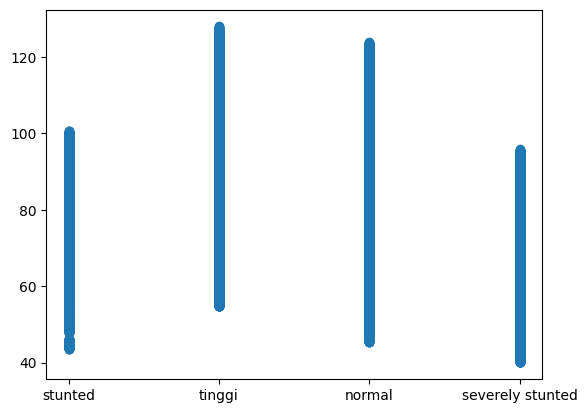

In [17]:
plt.scatter(np.array(df['Status']),np.array(df['Tinggi Badan (cm)']))
plt.show()

In [18]:
def train_test_split(x,y,test_size=0.20):
    train_size = int(len(x) * (1-test_size))
    indices = np.random.permutation(len(x))

    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    x_train,x_test = x.iloc[train_indices],x.iloc[test_indices]
    y_train,y_test = y.iloc[train_indices],y.iloc[test_indices]

    return x_train,x_test,y_train,y_test


In [19]:
x = df_norm.drop('Status',axis=1)
y = df_norm['Status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.02)


In [20]:
class KNN:
    def __init__(self,k):
        self.k = k
    
    def fit(self,x,y):
        self.x_train = list(x)
        self.y_train = list(y)

    def pred(self,test):
        # pred = [self._pred(x) for x in test]
        pred = []
        hit = 0
        for i in test:
            print(hit)
            pred.append(self._pred(i))
            hit +=1 
        return np.array(pred)

    def _pred(self,test):
        distance = [self._eclidean_distance(test,x) for x in self.x_train]
        kn_index = np.argsort(distance)[:self.k]
        kn_label = [self.y_train[i] for i in kn_index]

        count_label = {}
        for i in kn_label:
            if i in count_label:
                count_label[i] += 1
            else:
                count_label[i] = 1
        
        most_label = None
        max_count = 0
        for label,count in count_label.items():
            if max_count < count:
                most_label = label
                max_count = count
        return most_label
    
    def _eclidean_distance(self,x1,x2):
        return (sum((a-b)**2 for a,b in zip(x1,x2)))**0.5

In [21]:
x_test.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
4969,0.033333,1,0.158737
73227,0.616667,1,0.586315
77014,0.650000,1,0.724967
49045,0.416667,1,0.457890
119702,1.000000,1,0.946585


In [22]:
print(len(y_test))
y_test.head()

789


4969      stunted
73227      normal
77014      normal
49045     stunted
119702     normal
Name: Status, dtype: object

In [23]:
knn = KNN(k=5)
knn.fit(np.array(x_train),np.array(y_train))
res = knn.pred(np.array(x_test))
print(res)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [24]:
jum = 0
for i in range(len(res)):
    if res[i] == np.array(y_test)[i]:
        jum += 1
print(jum/len(res))
print(jum)

0.9873257287705957
779
